 Load and Explore the Dataset

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Crop Production data.csv')
df.head(10)


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000.0,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000.0,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000.0,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000.0,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000.0,Whole Year,Cashewnut,720.0,165.0
5,Andaman and Nicobar Islands,NICOBARS,2000.0,Whole Year,Coconut,18168.0,65100000.0
6,Andaman and Nicobar Islands,NICOBARS,2000.0,Whole Year,Dry ginger,36.0,100.0
7,Andaman and Nicobar Islands,NICOBARS,2000.0,Whole Year,Sugarcane,1.0,2.0
8,Andaman and Nicobar Islands,NICOBARS,2000.0,Whole Year,Sweet potato,5.0,15.0
9,Andaman and Nicobar Islands,NICOBARS,2000.0,Whole Year,Tapioca,40.0,169.0


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15831 entries, 0 to 15830
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State_Name     15831 non-null  object 
 1   District_Name  15830 non-null  object 
 2   Crop_Year      15830 non-null  float64
 3   Season         15830 non-null  object 
 4   Crop           15830 non-null  object 
 5   Area           15830 non-null  float64
 6   Production     15760 non-null  float64
dtypes: float64(3), object(4)
memory usage: 865.9+ KB


,Crop_Year,Area,Production
count,15830.000000,15830.000000,1.576000e+04
mean,2006.075237,9677.251678,1.168658e+06
std,5.125498,37736.103854,2.183598e+07
min,1997.000000,0.200000,0.000000e+00
25%,2002.000000,126.000000,1.957500e+02
50%,2006.000000,727.000000,1.251000e+03
75%,2011.000000,4000.000000,8.794000e+03
max,2014.000000,877029.000000,7.801620e+08


Data Cleaning and Preprocessing

Handling Missing Values

In [4]:
# Checking for missing values
missing_values = df.isnull().sum()
print(missing_values)


State_Name        0
District_Name     1
Crop_Year         1
Season            1
Crop              1
Area              1
Production       71
dtype: int64


In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [37]:
from sklearn.preprocessing import LabelEncoder

In [60]:

label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [61]:
import numpy as np

# Filling missing values with the mean for numeric columns only
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

Outlier Detection and Handling

In [6]:
from scipy import stats

# Z-score method to detect outliers
z_scores = stats.zscore(df.select_dtypes(include=[float, int]))
abs_z_scores = abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_clean = df[filtered_entries]

In [7]:

print("Original dataset shape:", df.shape)
print("Dataset shape after removing outliers:", df_clean.shape)

Original dataset shape: (15831, 7)
Dataset shape after removing outliers: (15515, 7)


Feature Engineering

Creating New Features

In [8]:
df_clean['Yield_per_Hectare'] = df_clean['Production'] / df_clean['Area']


<ipython-input-8-d595a56ec854>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Yield_per_Hectare'] = df_clean['Production'] / df_clean['Area']


Exploratory Data Analysis (EDA)

Correlation Matrix and Heatmap

Non-numeric columns: Index(['State_Name', 'District_Name', 'Season', 'Crop'], dtype='object')


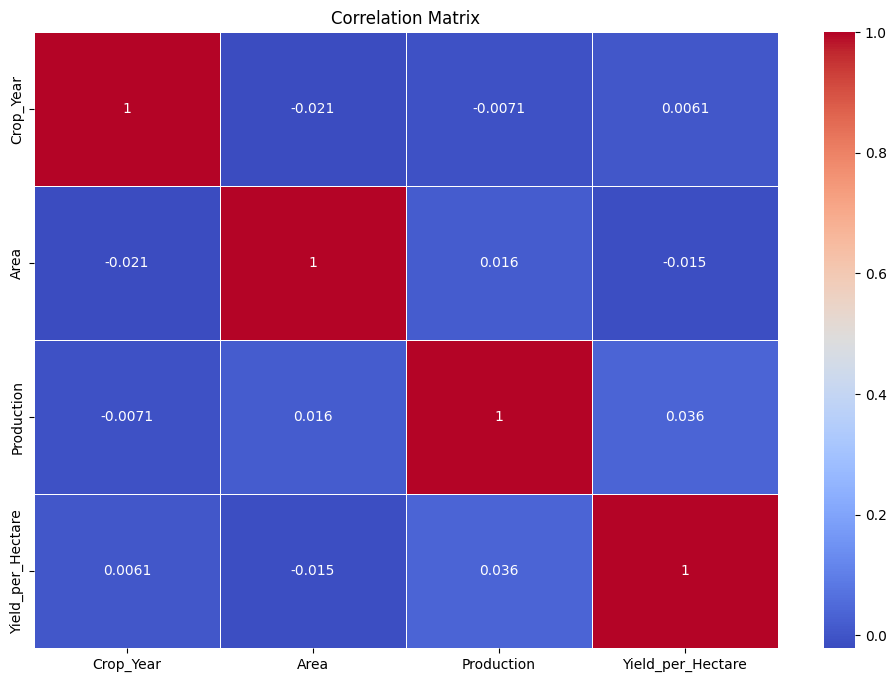

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Identify non-numeric columns
non_numeric_cols = df_clean.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_cols)


df_numeric = df_clean.drop(non_numeric_cols, axis=1)

plt.figure(figsize=(12, 8))
if 'df_numeric' in locals():
    correlation_matrix = df_numeric.corr()
else:
    correlation_matrix = df_clean.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Crop Production Trends Over the Years

Analyze how crop production has changed over time.

In [10]:

print(df_clean.columns)

if 'Year' in df_clean.columns:
    print(df_clean['Crop_Year'].dtype)
else:
    print("The 'Year' column does not exist in the DataFrame.")


Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production', 'Yield_per_Hectare'],
      dtype='object')
The 'Year' column does not exist in the DataFrame.


Pie Chart: Crop Production Distribution by Crop Type

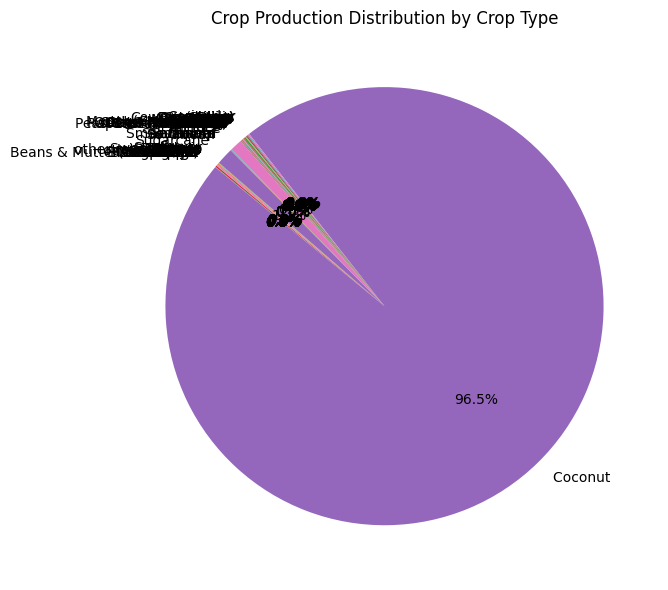

In [16]:
crop_production = df.groupby('Crop')['Production'].sum()
plt.figure(figsize=(10, 6))
plt.pie(crop_production, labels=crop_production.index, autopct='%1.1f%%', startangle=140, labeldistance=1.1)
plt.title('Crop Production Distribution by Crop Type')
plt.tight_layout()
plt.show()


Crop Production by Area

<ipython-input-17-f06d6bfb0128>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Crop'], y=df['Production'], palette='viridis')


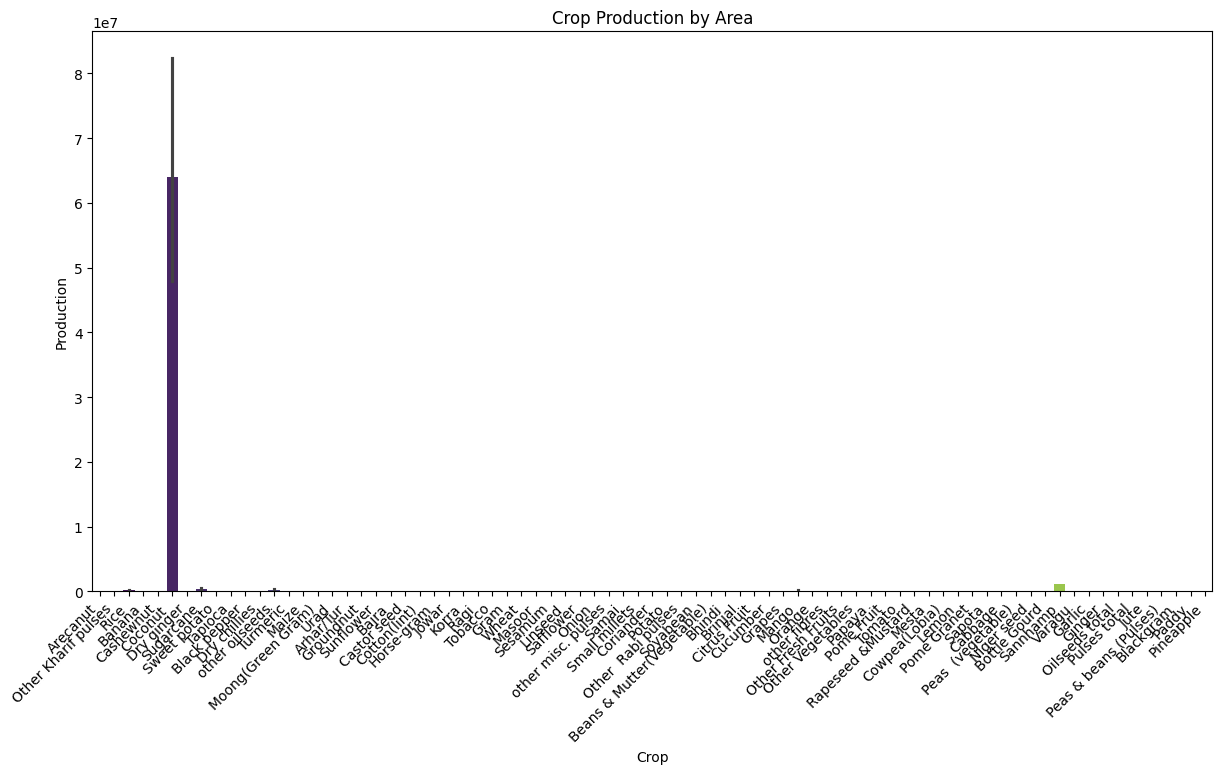

In [17]:

plt.figure(figsize=(14, 8))
sns.barplot(x=df['Crop'], y=df['Production'], palette='viridis')
plt.title('Crop Production by Area')
plt.xlabel('Crop')
plt.ylabel('Production')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.2)  # Adjust layout
plt.show()

 Production Trends Over Years

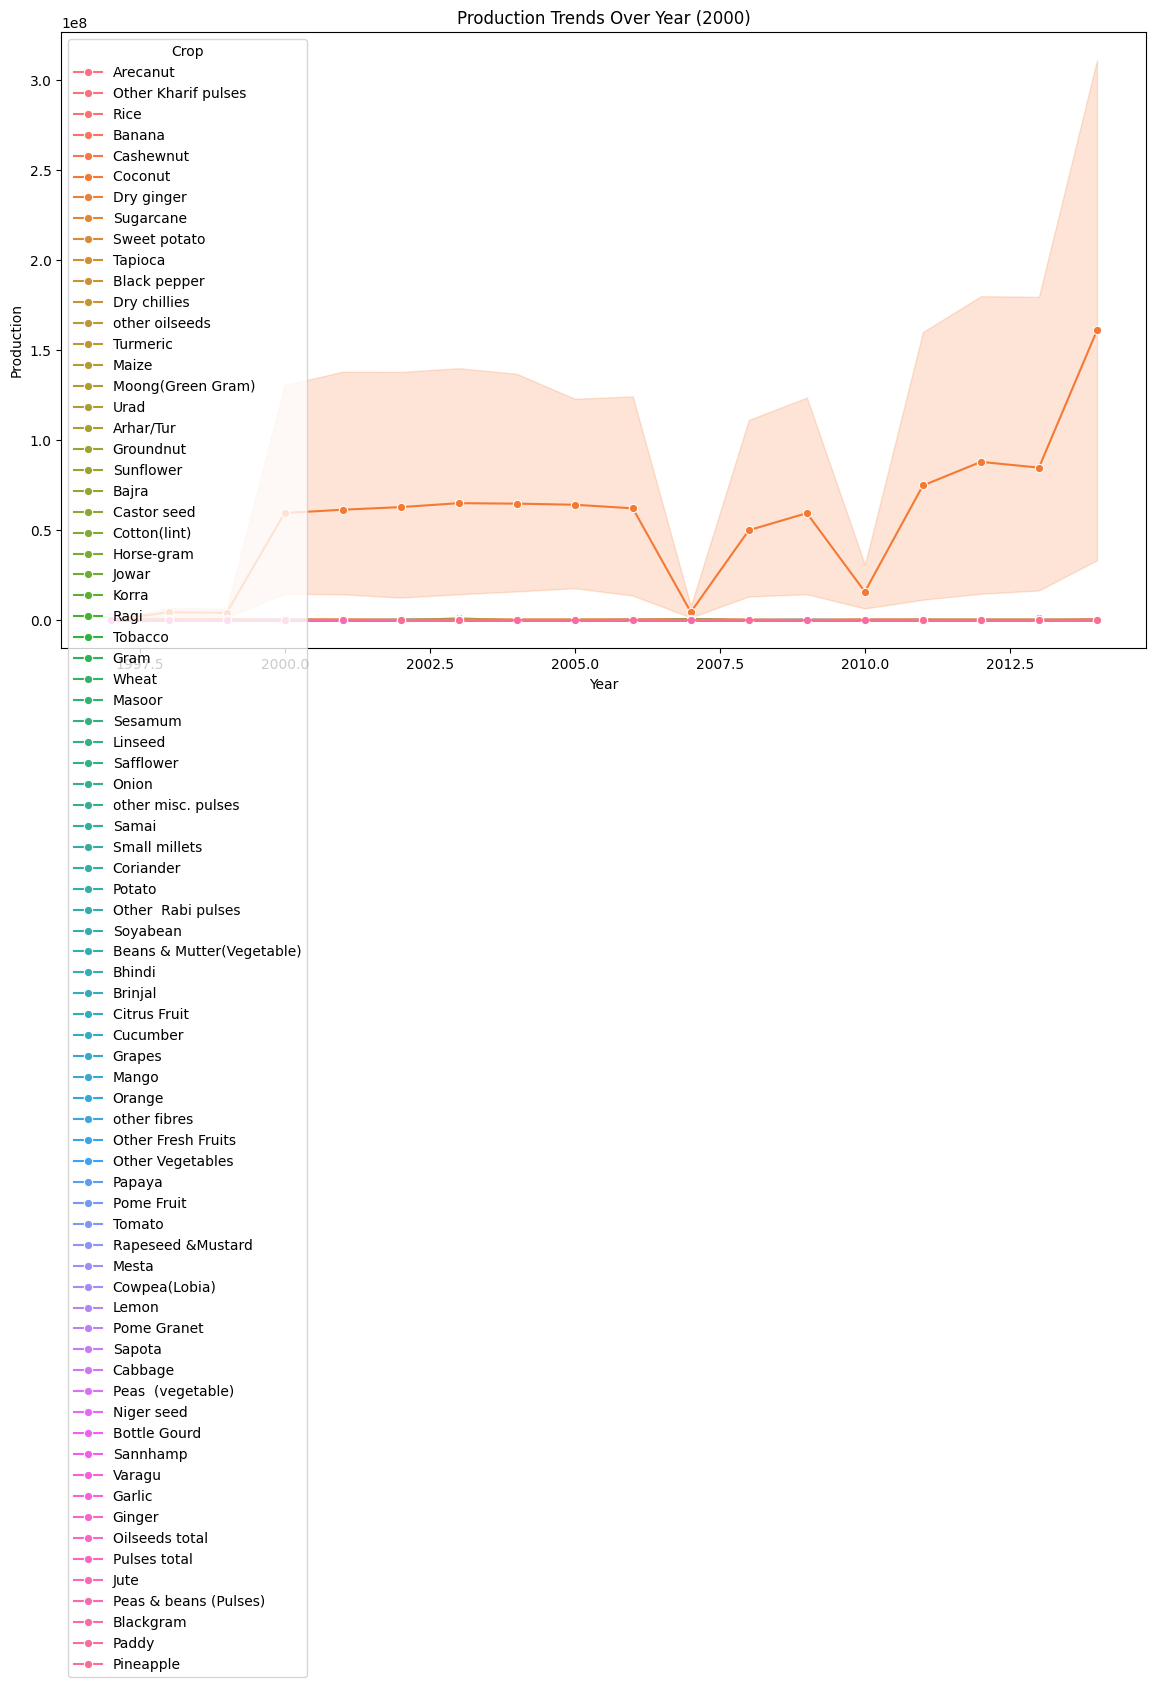

In [18]:
plt.figure(figsize=(14, 8))
sns.lineplot(x='Crop_Year', y='Production', hue='Crop', data=df, marker='o')
plt.title('Production Trends Over Year (2000)')
plt.xlabel('Year')
plt.ylabel('Production')
plt.show()

Histogram: Distribution of Production Values

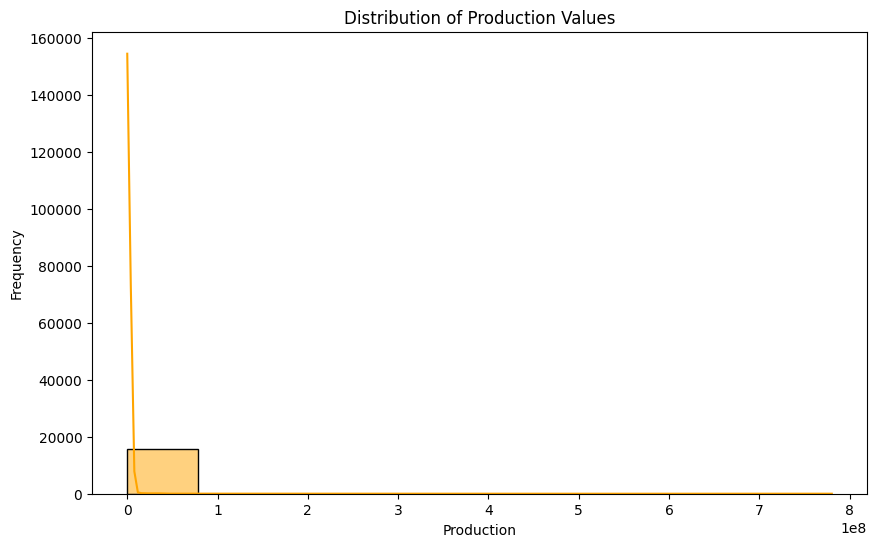

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Production'], bins=10, kde=True, color='orange')
plt.title('Distribution of Production Values')
plt.xlabel('Production')
plt.ylabel('Frequency')
plt.show()

Crop Production Distribution by State

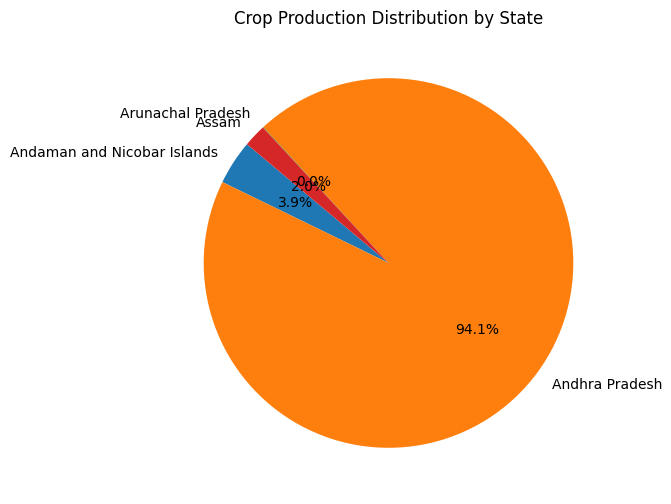

In [20]:

state_production = df.groupby('State_Name')['Production'].sum()

# Plotting the pie chart
plt.figure(figsize=(10, 6))
plt.pie(state_production, labels=state_production.index, autopct='%1.1f%%', startangle=140)
plt.title('Crop Production Distribution by State')
plt.show()

Top 10 Crops by Production

<ipython-input-21-53fb524caefa>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crop_production.values, y=crop_production.index, palette='viridis')


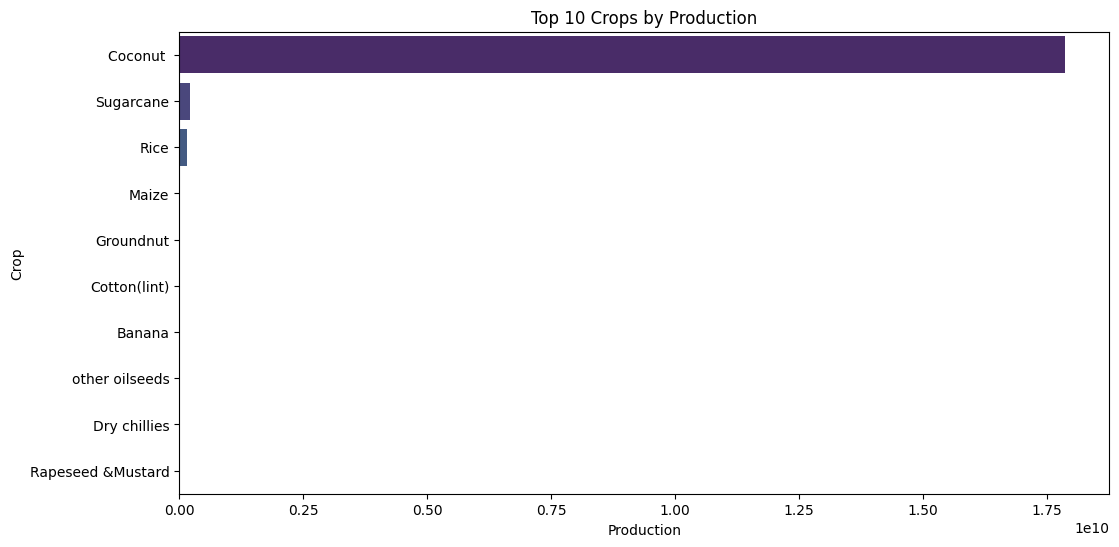

In [21]:
import seaborn as sns

# Aggregate production by crop
crop_production = df.groupby('Crop')['Production'].sum().sort_values(ascending=False).head(10)

# Plotting the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=crop_production.values, y=crop_production.index, palette='viridis')
plt.title('Top 10 Crops by Production')
plt.xlabel('Production')
plt.ylabel('Crop')
plt.show()


Production Trends Over Years for Top 3 Crops

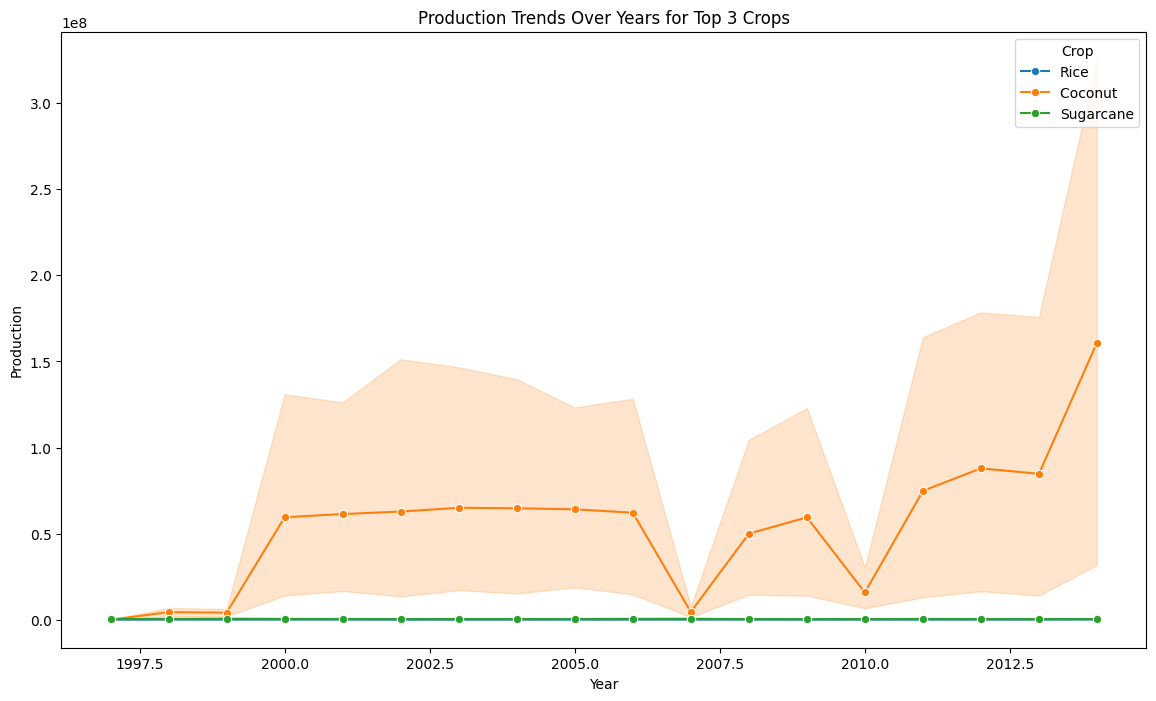

In [22]:
# Select top 3 crops
top_crops = crop_production.index[:3]
df_top_crops = df[df['Crop'].isin(top_crops)]

# Plotting the line plot
plt.figure(figsize=(14, 8))
sns.lineplot(x='Crop_Year', y='Production', hue='Crop', data=df_top_crops, marker='o')
plt.title('Production Trends Over Years for Top 3 Crops')
plt.xlabel('Year')
plt.ylabel('Production')
plt.show()


Area vs. Production with Yield per Hectare as Color

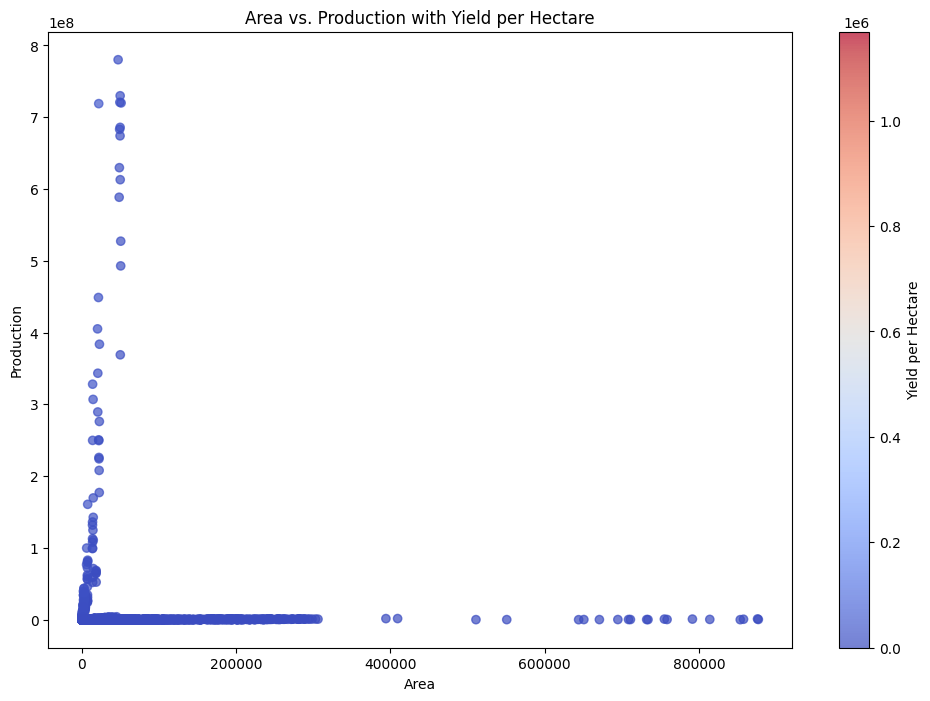

In [23]:
# Calculate yield per hectare
df['Yield_per_Hectare'] = df['Production'] / df['Area']

# Scatter plot with yield per hectare as color
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['Area'], df['Production'], c=df['Yield_per_Hectare'], cmap='coolwarm', alpha=0.7)
plt.colorbar(scatter, label='Yield per Hectare')
plt.title('Area vs. Production with Yield per Hectare')
plt.xlabel('Area')
plt.ylabel('Production')
plt.show()


Crop Production Trends Over the Years

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production', 'Yield_per_Hectare'],
      dtype='object')


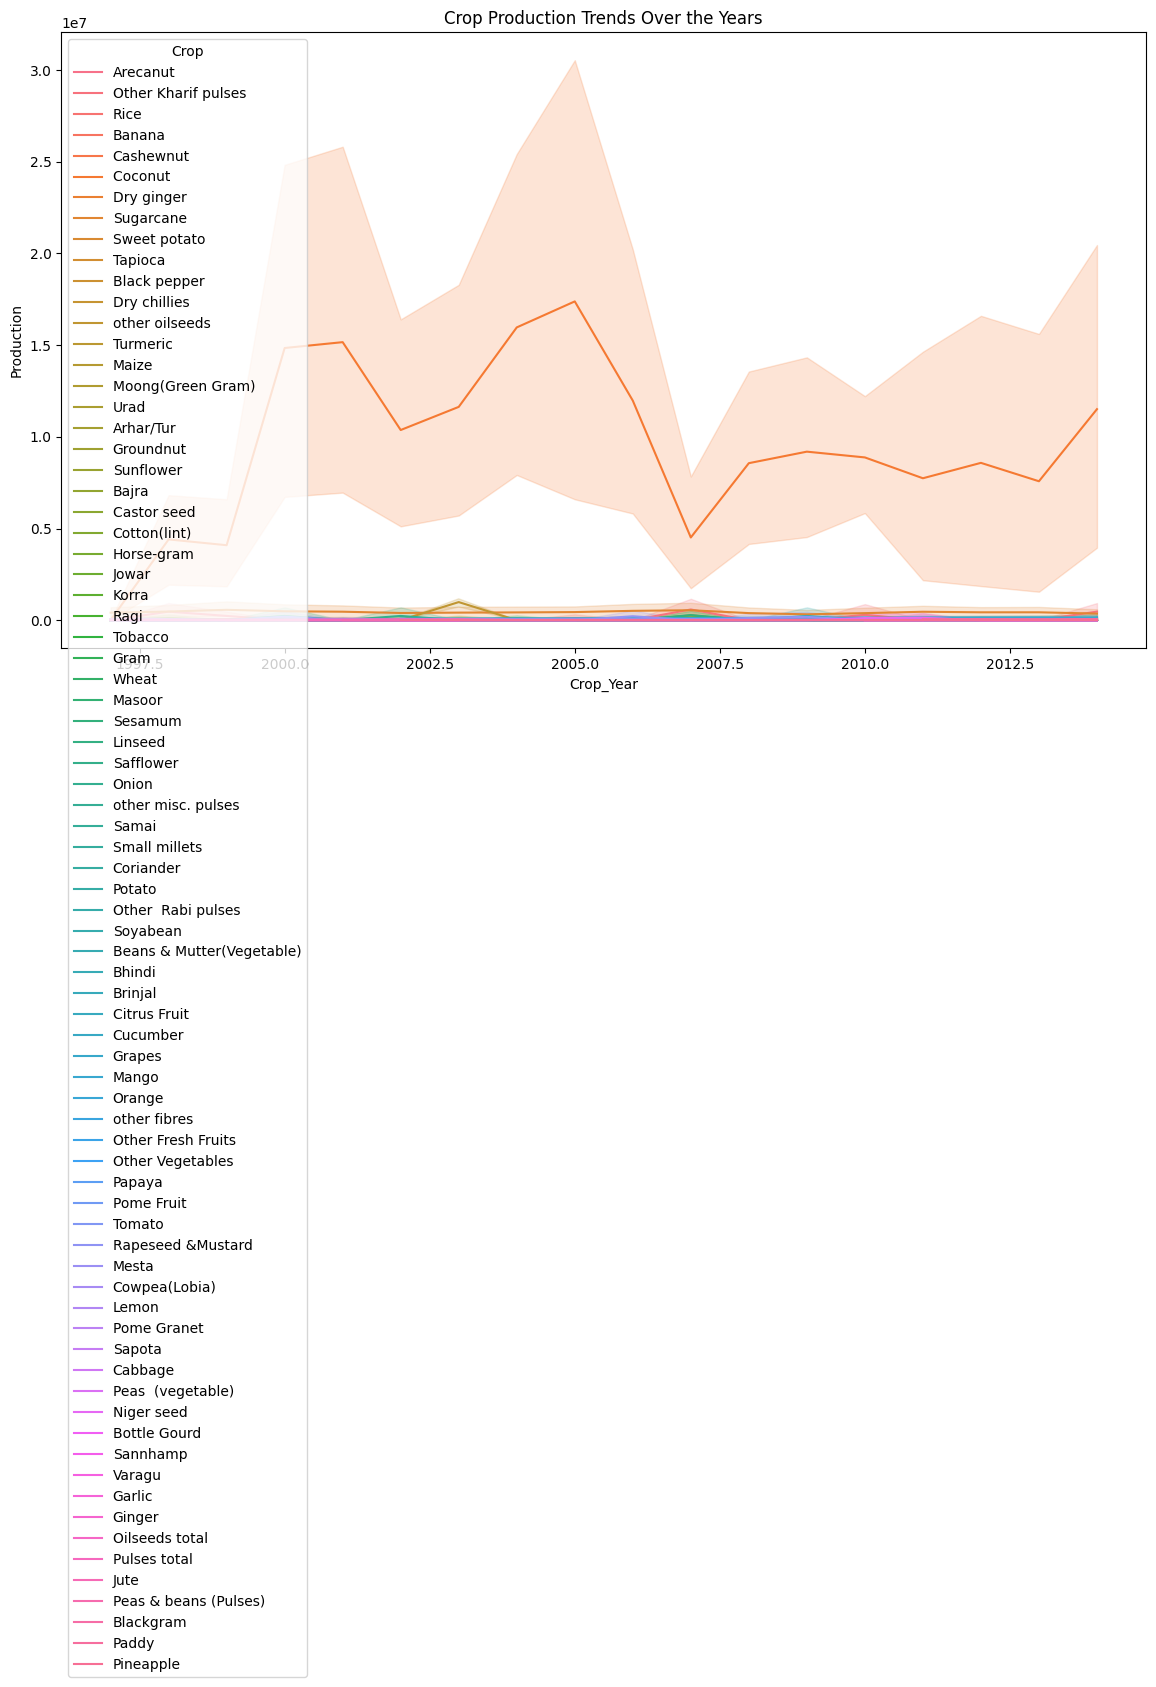

In [24]:

print(df_clean.columns)


plt.figure(figsize=(14, 8))
sns.lineplot(x='Crop_Year', y='Production', hue='Crop', data=df_clean)
plt.title('Crop Production Trends Over the Years')
plt.show()

 Predictive Modeling

Preparing the Data for Modeling

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

# Example dataset (replace with your actual data)
# Assuming df is your DataFrame and you have 'features' and 'target' columns
# Example:
# df = pd.read_csv('your_data.csv')
# X = df[['feature1', 'feature2', 'feature3']]  # Feature columns
# y = df['target']  # Target column

In [26]:

np.random.seed(42)
X = np.random.rand(100, 5)
y = np.random.rand(100)


In [27]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
# Training a Random Forest model
model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(max_depth=10, random_state=42)

In [31]:
# Predict and evaluate
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('RMSE (Random Forest):', rmse)


RMSE (Random Forest): 0.38741500892466685


In [32]:
# Training a Linear Regression model (for comparison)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [34]:
# Predict and evaluate for Linear Regression
y_pred_lr = lr_model.predict(X_test)
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
print('RMSE (Linear Regression):', rmse_lr)

RMSE (Linear Regression): 0.35203465547983964


In [56]:
# Predict and evaluate for Linear Regression
y_pred_lr = lr_model.predict(X_test)
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
print('RMSE (Linear Regression):', rmse_lr)

RMSE (Linear Regression): 0.35203465547983964


Plotting the Results

 Plot Predictions vs. Actual Values

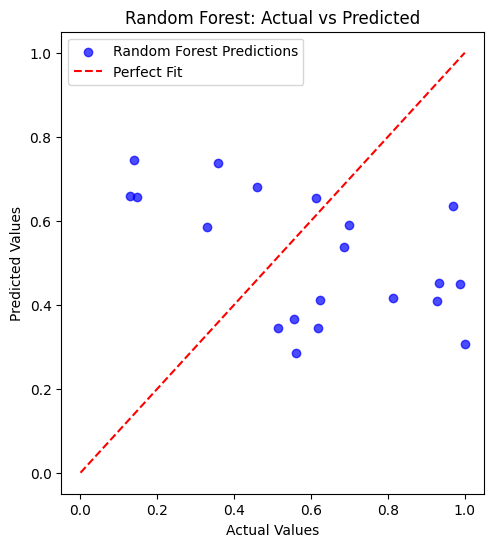

In [57]:
plt.figure(figsize=(12, 6))

# Plot Random Forest Predictions
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, color='blue', alpha=0.7, label='Random Forest Predictions')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Perfect Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest: Actual vs Predicted')
plt.legend()



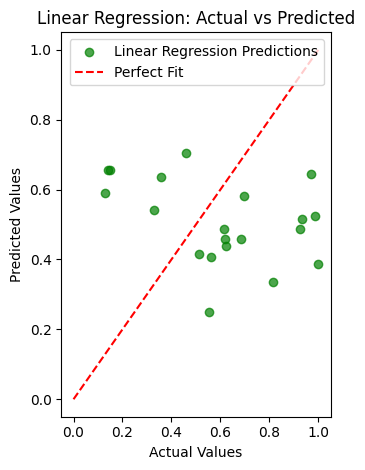

In [58]:
# Plot Linear Regression Predictions
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_lr, color='green', alpha=0.7, label='Linear Regression Predictions')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Perfect Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs Predicted')
plt.legend()

plt.tight_layout()
plt.show()


Plot RMSE Comparison

<ipython-input-59-1c425b6fff17>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=rmses, palette='viridis')


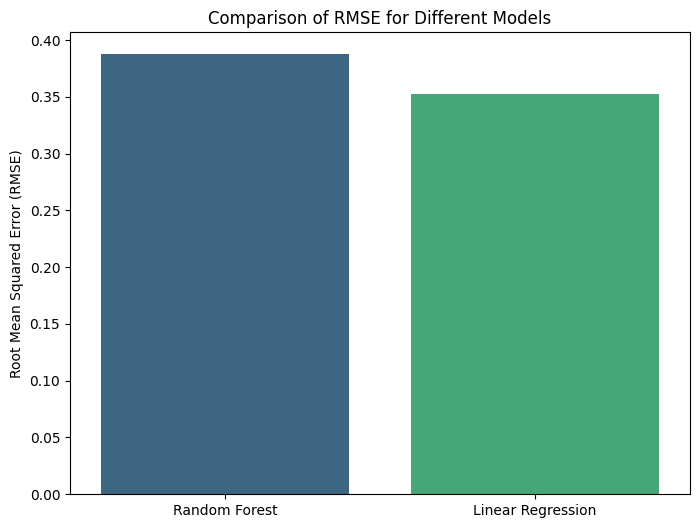

In [59]:
# RMSE values
models = ['Random Forest', 'Linear Regression']
rmses = [rmse, rmse_lr]

plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=rmses, palette='viridis')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Comparison of RMSE for Different Models')
plt.show()


CONCLUSION:


Based on the RMSE values and the plots:


**(i).RMSE (Random Forest):** Displays how well the Random Forest model performed on the test set. Lower RMSE indicates better performance.

**(ii).RMSE (Linear Regression):** Displays how well the Linear Regression model performed on the test set.
In the Conclusion Section:

**(iii)Model Comparison:**

Compare the RMSE values of Random Forest and Linear Regression. A lower RMSE indicates a better fit to the data.

**(iv).Visualization:** The scatter plots will show how close the predicted values are to the actual values for each model. A scatter around the diagonal line (perfect fit) indicates a good model.

<ipython-input-62-1c425b6fff17>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=rmses, palette='viridis')


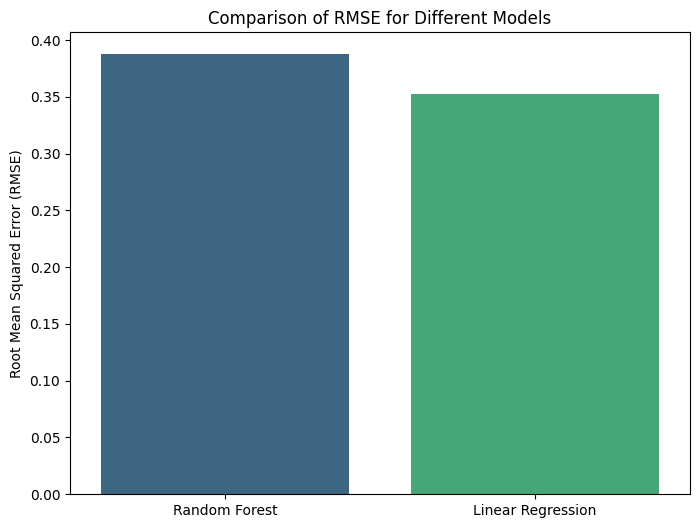

In [62]:
# RMSE values
models = ['Random Forest', 'Linear Regression']
rmses = [rmse, rmse_lr]

plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=rmses, palette='viridis')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Comparison of RMSE for Different Models')
plt.show()


<ipython-input-63-1c425b6fff17>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=rmses, palette='viridis')


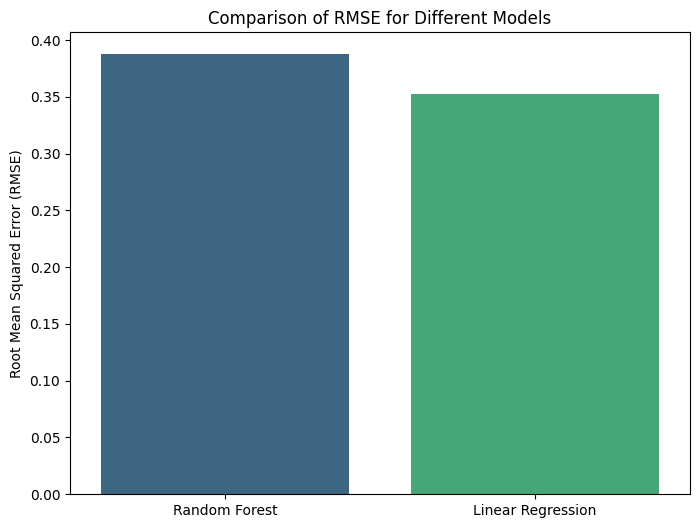

In [63]:
# RMSE values
models = ['Random Forest', 'Linear Regression']
rmses = [rmse, rmse_lr]

plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=rmses, palette='viridis')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Comparison of RMSE for Different Models')
plt.show()


<ipython-input-64-1c425b6fff17>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=rmses, palette='viridis')


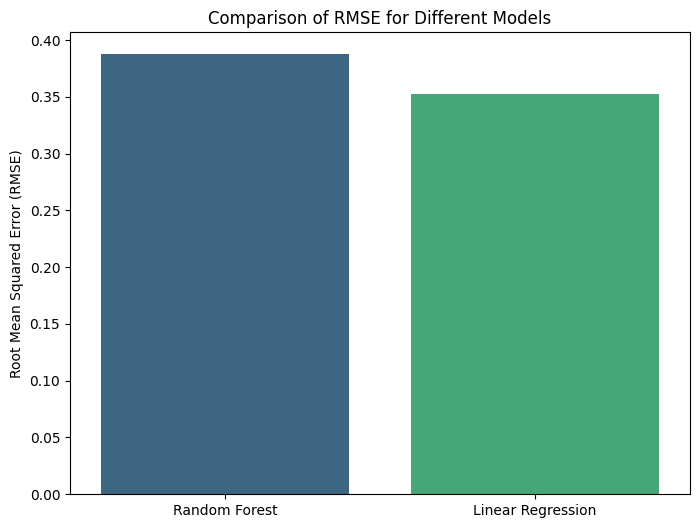

In [64]:
# RMSE values
models = ['Random Forest', 'Linear Regression']
rmses = [rmse, rmse_lr]

plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=rmses, palette='viridis')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Comparison of RMSE for Different Models')
plt.show()
